In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [3]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [4]:
sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
sample_sizes = [1000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/OUTPUT/mcm/sample_sizes")
test_mcms, test_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

In [5]:
# can always only do distance between two
# probably want distance own vs other
# the mcm that maximises the distance is the one that is selected in the classifier

In [6]:
# # select a digit that is the "test image", the one that is shown to all
# # select the most indicative icc for own vs a test image of that category
# # NOTE: in real life we do not know what category the test image is from
# # cannot take most indicative icc
# all_byk = []
# sample_idx = 0
# run_idx = 0
# test_digit = 0 # we show a 0 to all mcm and see who has highest reponse
# # mcms_range = range(10)
# mcms_range = [3,]
# for mcm_idx in mcms_range:
#     digit_pair = [mcm_idx,test_digit] # own vs test digit
#     _, icc_data,dists = utils.distmap_from_testprobs(test_probs, test_mcms, digit_pair, mcm_idx, sample_idx,run_idx, return_iccdata=True,return_dists=True)
#     ord_distidcs = np.argsort(dists)[::-1]
#     by_k = np.cumprod(icc_data[ord_distidcs],axis=0)[:,:,digit_pair]
#     all_byk.append(by_k)

In [288]:
sample_idx = 0
run_idx = 0
digit_pair = [3,5]
all_byk_pair, all_byk_modspin = utils.get_all_byk_pair(test_probs, test_mcms, digit_pair, sample_idx, run_idx)
all_byk_pair = utils.adjust_smaller_icc(all_byk_pair,all_byk_modspin)

In [289]:
# find the ones that are misclassified at the largest sample size

# the images of index digit 0 that are misclassified at max k
misclassified_img0_idcs = np.argwhere(all_byk_pair[0][-1,:,0] < all_byk_pair[1][-1,:,0]) # misclassified img idx0
misclassified_img1_idcs = np.argwhere(all_byk_pair[0][-1,:,1] > all_byk_pair[1][-1,:,1]) # misclassified img idx1

misclf_idcs = [misclassified_img0_idcs, misclassified_img1_idcs]
# misclf = [all_byk_pair[i][:,misclf_idcs[i],:] for i in range(2)]
misclf_idcs[0].shape

# for mcm 0: get indices for images of digit 0 that have been misclassified # [11,24,26]
# for mcm 0: get indices for images of digit 1 that have been misclassified # [99]

# for mcm 1: also get those 4 digits
# then slice the probability over k for both mcm


idx_ord = np.argsort([all_byk_pair[i].shape[0] for i in range(2)])
idx_ord, [all_byk_pair[0].shape[0], all_byk_pair[1].shape[0]]


(array([1, 0]), [29, 27])

In [290]:

mcm0_misc1 = all_byk_pair[0][:,misclf_idcs[1],1]
mcm1_misc1 = all_byk_pair[1][:,misclf_idcs[1],1]

appendix_misc1 = np.tile(all_byk_pair[short_long[0]][-1,misclf_idcs[short_long[0]],1], (nspin_diff,1,1))
mcm0_misc1 = np.concatenate((mcm0_misc1, appendix_misc1))


In [291]:
all_byk_pair[short_long[0]][-1,misclf_idcs[0],0].shape

(53, 1)

In [292]:
# 1. slice 4 arrays: for each mcm slice each digit
# make short longer to fit size of longer mcm by reprepeatablyeaditely appending the full mcm probabilities


def misclassified_trajec_singledig(all_byk_pair,misclf_idcs, digit_index):
    short_long = np.argsort([all_byk_pair[i].shape[0] for i in range(2)])
    nspin_diff = np.abs(np.diff([all_byk_pair[0].shape[0], all_byk_pair[1].shape[0]]))[0]


    mcm0_misc0 = all_byk_pair[0][:,misclf_idcs[digit_index],digit_index]
    mcm1_misc0 = all_byk_pair[1][:,misclf_idcs[digit_index],digit_index]

    misc_digi0 = [mcm0_misc0,mcm1_misc0]

    appendix_short = np.tile(all_byk_pair[short_long[0]][-1,misclf_idcs[digit_index],digit_index], (nspin_diff,1,1))
    mcm_short = np.squeeze(np.concatenate((misc_digi0[short_long[0]], appendix_short)))

    if short_long[0] == 1:
        out_misc_digi0 = np.stack([np.squeeze(misc_digi0[short_long[1]]),np.squeeze(mcm_short)]) # (mcm_idx, icc, image)
    else:
        out_misc_digi0 = np.stack([np.squeeze(mcm_short), np.squeeze(misc_digi0[short_long[1]])]) # (mcm_idx, icc, image)

    return out_misc_digi0



all_misc = [misclassified_trajec_singledig(all_byk_pair,misclf_idcs, digit_index) for digit_index in range(2)]


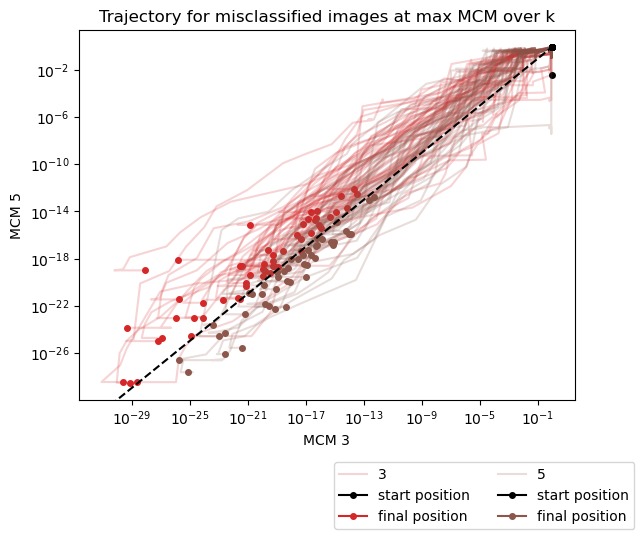

In [293]:
import matplotlib.pyplot as plt
import numpy as np


# data = all_byk_pair[0]

colors = myplot.get_list_fromcmap("tab10", N=10)

for dig_i, data in enumerate(all_misc): # shape each (mcm_idx, icc, image)


    plt.plot(data[0, :, 0], data[1, :, 0], color=colors[digit_pair[dig_i]], label=f"{digit_pair[dig_i]}", alpha=.2)
    plt.plot(data[0, 0, 0], data[1, 0, 0], marker="o", color="black", markersize=4, label="start position")  # First point marker
    plt.plot(data[0, -1, 0], data[1, -1, 0], marker="o", color=colors[digit_pair[dig_i]], markersize=4,label="final position")  # Last point marker
    for i in range(1, data.shape[2]):
        x = data[0, :, i]
        y = data[1, :, i]
        plt.plot(x, y, color=colors[digit_pair[dig_i]], alpha=.2)
        plt.plot(x[0], y[0], marker="o", color="black", markersize=4)  # First point marker
        plt.plot(x[-1], y[-1], marker="o", color=colors[digit_pair[dig_i]], markersize=4)  # Last point marker



# plt.xlim([np.min(data[:,:,0]), np.max(data[:,:,0])])
# plt.ylim([np.min(data[:,:,1]), np.max(data[:,:,1])])


# m_max = np.max([np.max(all_byk_pair[i][-1,...]) for i in range(len(all_byk_pair))])
# m_min = np.min([np.min(all_byk_pair[i][-1,...]) for i in range(len(all_byk_pair))])
# plt.ylim((m_min**.8,m_max))
# plt.xlim((m_min**.8,m_max))

plt.ylabel(f"MCM {digit_pair[1]}")
plt.xlabel(f"MCM {digit_pair[0]}")
plt.legend(loc="upper left", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xscale("log")
plt.yscale("log")

plt.autoscale(False)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.title(f"Trajectory for misclassified images at max MCM over k")
plt.show()

(array([881.,   6.,   3.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([1.46670623e-31, 6.09362208e-12, 1.21872442e-11, 1.82808662e-11,
        2.43744883e-11, 3.04681104e-11, 3.65617325e-11, 4.26553546e-11,
        4.87489767e-11, 5.48425987e-11, 6.09362208e-11]),
 <BarContainer object of 10 artists>)

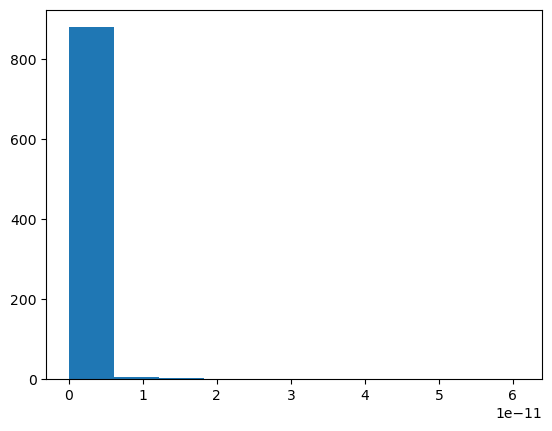

In [83]:
res = all_byk_pair[0][-1,:,0]
plt.hist(res)

In [8]:
data_max = np.max([np.max(all_byk_pair[i]) for i in range(len(all_byk_pair))])
data_min = np.min([np.min(all_byk_pair[i]) for i in range(len(all_byk_pair))])

maxs = [np.max(all_byk_pair[i]) for i in range(len(all_byk_pair))]
mins = [np.min(all_byk_pair[i]) for i in range(len(all_byk_pair))]
print(maxs,mins)

[0.9922577422577422, 0.9672827172827173] [5.5803092186358434e-40, 2.208502429470926e-48]


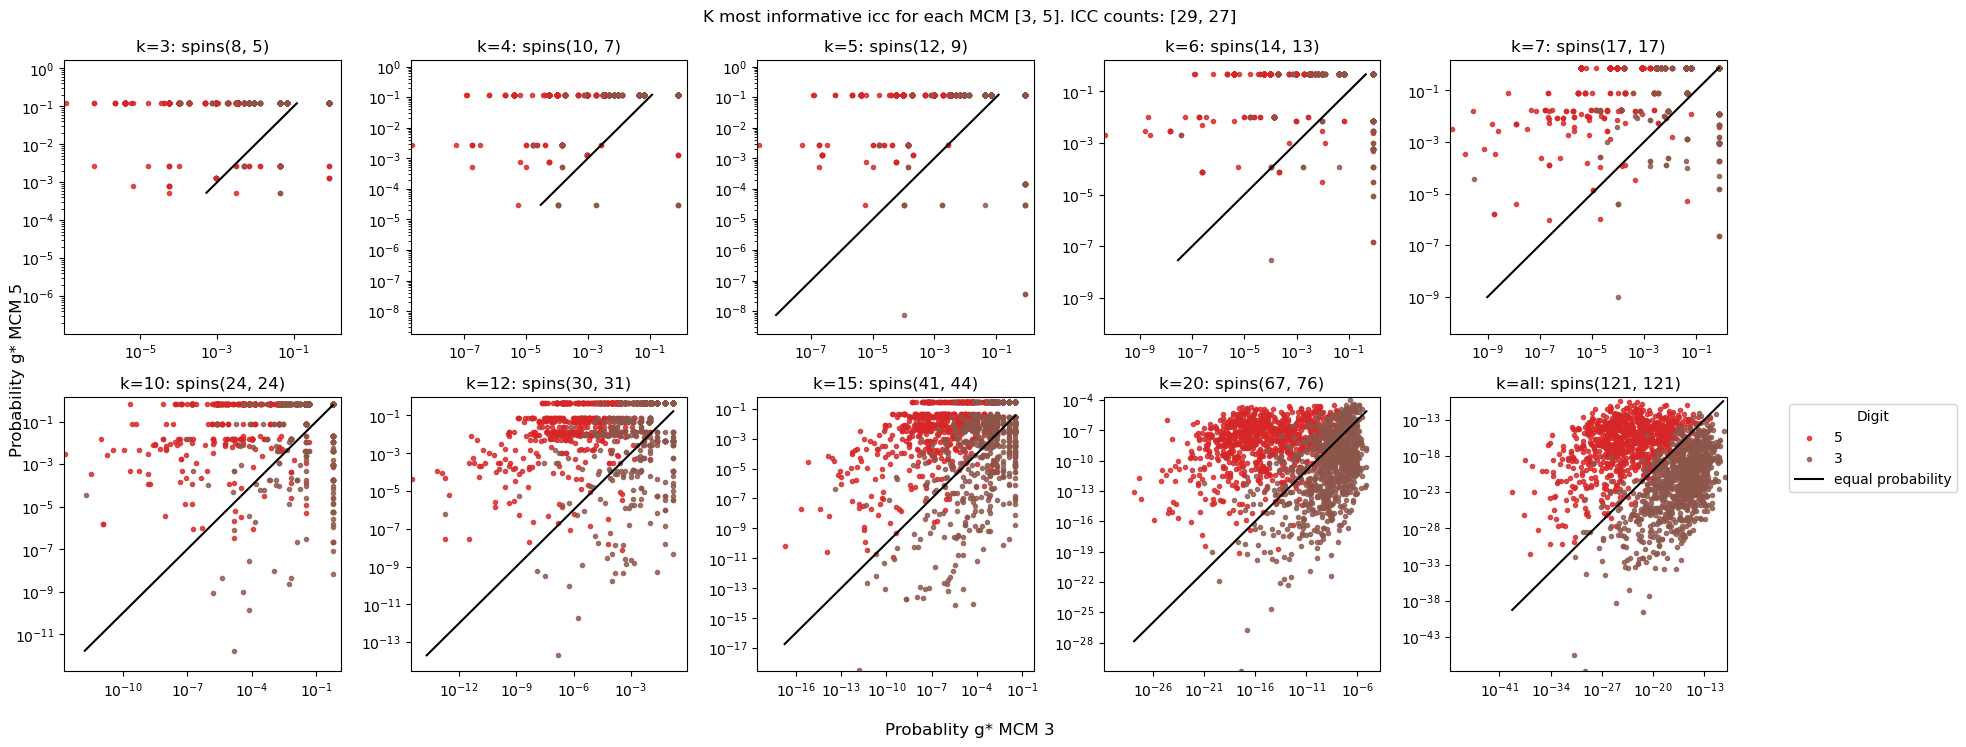

In [9]:
# take say top 5, 3 , 1 in subplots
# k = 3 e.g.,
# take top 3 k for every icc and plot histogram of test


fig, axs = plt.subplots(2,5,figsize=(20,7.5))
# fig, axs = plt.subplots(1,2,figsize=(20,7.5))

axs = axs.ravel()
# logbins = np.geomspace(data_min,data_max, 40)
len_shortest_mcm = np.min([len(i) for i in all_byk_pair])-1

top_ks = [3,4,5,6,7,
          10,12,15,20,0]
colors = myplot.get_list_fromcmap("tab10", N=10)
# top_ks = [1,4]

for j, k in enumerate(top_ks):
    ax = axs[j]

    max = np.min([np.max(all_byk_pair[i][k-1,...]) for i in range(len(all_byk_pair))])
    min = np.max([np.min(all_byk_pair[i][k-1,...]) for i in range(len(all_byk_pair))])
    
    mAsA = all_byk_pair[0][k-1,:,0]
    mAsB = all_byk_pair[0][k-1,:,1]
    mBsA = all_byk_pair[1][k-1,:,0]
    mBsB = all_byk_pair[1][k-1,:,1]
        
    ax.scatter(mAsB,mBsB, label=f"{digit_pair[1]}",alpha=.8,marker=".", color=colors[digit_pair[0]]) # data for seeing digit B
    ax.scatter(mAsA,mBsA, label=f"{digit_pair[0]}",alpha=.8,marker=".", color=colors[digit_pair[1]]) # data for seeing digit A
    ax.plot((min,max),(min,max),color="black", label="equal probability")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(f"k={k if k!=0 else 'all'}: spins{all_byk_modspin[0][k-1], all_byk_modspin[1][k-1]}")
    
    m_max = np.max([np.max(all_byk_pair[i][k-1,...]) for i in range(len(all_byk_pair))])
    m_min = np.min([np.min(all_byk_pair[i][k-1,...]) for i in range(len(all_byk_pair))])
    ax.set_ylim((m_min*.9,m_max*2))
    ax.set_xlim((m_min*.9,m_max*2))
    
fig.supxlabel(f"Probablity g* MCM {digit_pair[0]}")
fig.supylabel(f"Probability g* MCM {digit_pair[1]}")


plt.legend(title="Digit", bbox_to_anchor=(1.2,1,0,0))
fig.suptitle(f"K most informative icc for each MCM {digit_pair}. ICC counts: {[len(i) for i in  all_byk_modspin]}")
fig.tight_layout()

